In [81]:
import datetime
import griddb_python as griddb
import sys
import pandas as pd
import traceback
import matplotlib.pyplot as plt
import statsmodels
import itertools
from dateutil.relativedelta import relativedelta

factory = griddb.StoreFactory.get_instance()
argv = sys.argv

gridstore = factory.get_store(
        host="239.0.0.1",
        port=31999,
        cluster_name="defaultCluster",
        username="admin",
        password="admin"
)

conInfo = griddb.ContainerInfo("NYCC_AGGS",
                [["key", griddb.Type.STRING], 
                ["timestamp", griddb.Type.TIMESTAMP],
                ["precinct", griddb.Type.INTEGER],
                ["count", griddb.Type.LONG]],
            griddb.ContainerType.COLLECTION, True)

aggcn = gridstore.put_container(conInfo)

tqls=[]
dt =  datetime.datetime(2006, 1, 1, 0, 0, 0)
while dt < datetime.datetime(2016, 1, 1, 0, 0):
    start = int(dt.timestamp()*1000)
    end = int((dt + relativedelta(months=+1)).timestamp()*1000)
    query = "select count(*) where CMPLNT_FR > TO_TIMESTAMP_MS("+str(start)+")"
    query = query + " AND CMPLNT_FR < TO_TIMESTAMP_MS("+str(end)+")"
    tqls.append([dt, query])
    dt = dt + relativedelta(months=+1);

cols = []
for x in range(1, 125):
    col = gridstore.get_container("precinct_"+str(x))
    if col != None:
        cols.append([x, col])

for col in cols:
    for tql in tqls:
        q = col[1].query(tql[1])
        try:
            rs = q.fetch(False)
            if rs.has_next():
                data = rs.next()
                count = data.get(griddb.Type.LONG)
                print([str(col[0])+"_"+str(tql[0].timestamp()), tql[0], col[0], count ])
                aggcn.put([str(col[0])+"_"+str(tql[0].timestamp()), tql[0], col[0], count ])
        except:
            pass
            
            





['1_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 1, 514]
['1_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 1, 402]
['1_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 1, 547]
['1_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 1, 392]
['1_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 1, 556]
['1_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 1, 520]
['1_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 1, 557]
['1_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 1, 592]
['1_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 1, 498]
['1_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 1, 536]
['1_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 1, 452]
['1_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 1, 555]
['1_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 1, 484]
['1_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 1, 432]
['1_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 1, 518]
['1_1175382000.0', datetime.datetime(

['5_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 5, 347]
['5_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 5, 372]
['5_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 5, 380]
['5_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 5, 411]
['5_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 5, 379]
['5_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 5, 383]
['5_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 5, 404]
['5_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 5, 353]
['5_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 5, 391]
['5_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 5, 338]
['5_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 5, 416]
['5_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 5, 341]
['5_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 5, 407]
['5_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 5, 374]
['5_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 5, 401]
['5_1249081200.0', datetime.datetime(

['6_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 6, 443]
['6_1285887600.0', datetime.datetime(2010, 10, 1, 0, 0), 6, 507]
['6_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 6, 432]
['6_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 6, 367]
['6_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 6, 329]
['6_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 6, 393]
['6_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 6, 374]
['6_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 6, 423]
['6_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 6, 487]
['6_1306882800.0', datetime.datetime(2011, 6, 1, 0, 0), 6, 492]
['6_1309474800.0', datetime.datetime(2011, 7, 1, 0, 0), 6, 445]
['6_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 6, 429]
['6_1314831600.0', datetime.datetime(2011, 9, 1, 0, 0), 6, 449]
['6_1317423600.0', datetime.datetime(2011, 10, 1, 0, 0), 6, 547]
['6_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 6, 489]
['6_1322697600.0', datetime.datetim

['7_1314831600.0', datetime.datetime(2011, 9, 1, 0, 0), 7, 280]
['7_1317423600.0', datetime.datetime(2011, 10, 1, 0, 0), 7, 349]
['7_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 7, 294]
['7_1322697600.0', datetime.datetime(2011, 12, 1, 0, 0), 7, 328]
['7_1325376000.0', datetime.datetime(2012, 1, 1, 0, 0), 7, 355]
['7_1328054400.0', datetime.datetime(2012, 2, 1, 0, 0), 7, 310]
['7_1330560000.0', datetime.datetime(2012, 3, 1, 0, 0), 7, 375]
['7_1333234800.0', datetime.datetime(2012, 4, 1, 0, 0), 7, 391]
['7_1335826800.0', datetime.datetime(2012, 5, 1, 0, 0), 7, 343]
['7_1338505200.0', datetime.datetime(2012, 6, 1, 0, 0), 7, 307]
['7_1341097200.0', datetime.datetime(2012, 7, 1, 0, 0), 7, 380]
['7_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 7, 379]
['7_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 7, 362]
['7_1349046000.0', datetime.datetime(2012, 10, 1, 0, 0), 7, 333]
['7_1351728000.0', datetime.datetime(2012, 11, 1, 0, 0), 7, 311]
['7_1354320000.0', datetime.datetim

['9_1335826800.0', datetime.datetime(2012, 5, 1, 0, 0), 9, 531]
['9_1338505200.0', datetime.datetime(2012, 6, 1, 0, 0), 9, 563]
['9_1341097200.0', datetime.datetime(2012, 7, 1, 0, 0), 9, 595]
['9_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 9, 550]
['9_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 9, 539]
['9_1349046000.0', datetime.datetime(2012, 10, 1, 0, 0), 9, 486]
['9_1351728000.0', datetime.datetime(2012, 11, 1, 0, 0), 9, 444]
['9_1354320000.0', datetime.datetime(2012, 12, 1, 0, 0), 9, 488]
['9_1356998400.0', datetime.datetime(2013, 1, 1, 0, 0), 9, 496]
['9_1359676800.0', datetime.datetime(2013, 2, 1, 0, 0), 9, 458]
['9_1362096000.0', datetime.datetime(2013, 3, 1, 0, 0), 9, 553]
['9_1364770800.0', datetime.datetime(2013, 4, 1, 0, 0), 9, 467]
['9_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 9, 498]
['9_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 9, 481]
['9_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 9, 531]
['9_1375311600.0', datetime.datetime(

['10_1425168000.0', datetime.datetime(2015, 3, 1, 0, 0), 10, 292]
['10_1427842800.0', datetime.datetime(2015, 4, 1, 0, 0), 10, 301]
['10_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 10, 321]
['10_1433113200.0', datetime.datetime(2015, 6, 1, 0, 0), 10, 316]
['10_1435705200.0', datetime.datetime(2015, 7, 1, 0, 0), 10, 357]
['10_1438383600.0', datetime.datetime(2015, 8, 1, 0, 0), 10, 399]
['10_1441062000.0', datetime.datetime(2015, 9, 1, 0, 0), 10, 329]
['10_1443654000.0', datetime.datetime(2015, 10, 1, 0, 0), 10, 303]
['10_1446336000.0', datetime.datetime(2015, 11, 1, 0, 0), 10, 319]
['10_1448928000.0', datetime.datetime(2015, 12, 1, 0, 0), 10, 304]
['13_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 13, 603]
['13_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 13, 544]
['13_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 13, 593]
['13_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 13, 380]
['13_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 13, 640]
['13_11

['14_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 14, 1232]
['14_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 14, 1141]
['14_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 14, 1181]
['14_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 14, 1078]
['14_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 14, 991]
['14_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 14, 1190]
['14_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 14, 1067]
['14_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 14, 1102]
['14_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 14, 1077]
['14_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 14, 1095]
['14_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 14, 1154]
['14_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 14, 1070]
['14_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 14, 1130]
['14_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 14, 1034]
['14_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 

['17_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 17, 327]
['17_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 17, 285]
['17_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 17, 332]
['17_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 17, 266]
['17_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 17, 271]
['17_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 17, 269]
['17_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 17, 253]
['17_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 17, 267]
['17_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 17, 276]
['17_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 17, 274]
['17_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 17, 254]
['17_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 17, 278]
['17_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 17, 295]
['17_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 17, 249]
['17_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 17, 267]
['17_1

['18_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 18, 718]
['18_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 18, 627]
['18_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 18, 528]
['18_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 18, 656]
['18_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 18, 549]
['18_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 18, 631]
['18_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 18, 620]
['18_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 18, 669]
['18_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 18, 749]
['18_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 18, 692]
['18_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 18, 710]
['18_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 18, 686]
['18_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 18, 668]
['18_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 18, 693]
['18_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 18, 526]
['18_1

['19_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 19, 549]
['19_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 19, 457]
['19_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 19, 487]
['19_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 19, 447]
['19_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 19, 521]
['19_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 19, 474]
['19_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 19, 518]
['19_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 19, 489]
['19_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 19, 416]
['19_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 19, 450]
['19_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 19, 514]
['19_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 19, 509]
['19_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 19, 495]
['19_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 19, 529]
['19_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 19, 551]
['19_12

['20_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 20, 356]
['20_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 20, 367]
['20_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 20, 342]
['20_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 20, 377]
['20_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 20, 359]
['20_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 20, 322]
['20_1285887600.0', datetime.datetime(2010, 10, 1, 0, 0), 20, 367]
['20_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 20, 363]
['20_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 20, 312]
['20_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 20, 276]
['20_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 20, 270]
['20_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 20, 268]
['20_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 20, 306]
['20_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 20, 313]
['20_1306882800.0', datetime.datetime(2011, 6, 1, 0, 0), 20, 321]
['20_13

['22_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 22, 51]
['22_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 22, 53]
['22_1349046000.0', datetime.datetime(2012, 10, 1, 0, 0), 22, 46]
['22_1351728000.0', datetime.datetime(2012, 11, 1, 0, 0), 22, 19]
['22_1354320000.0', datetime.datetime(2012, 12, 1, 0, 0), 22, 28]
['22_1356998400.0', datetime.datetime(2013, 1, 1, 0, 0), 22, 11]
['22_1359676800.0', datetime.datetime(2013, 2, 1, 0, 0), 22, 18]
['22_1362096000.0', datetime.datetime(2013, 3, 1, 0, 0), 22, 19]
['22_1364770800.0', datetime.datetime(2013, 4, 1, 0, 0), 22, 46]
['22_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 22, 46]
['22_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 22, 50]
['22_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 22, 61]
['22_1375311600.0', datetime.datetime(2013, 8, 1, 0, 0), 22, 61]
['22_1377990000.0', datetime.datetime(2013, 9, 1, 0, 0), 22, 56]
['22_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 22, 38]
['22_1383264000.0', d

['23_1404169200.0', datetime.datetime(2014, 7, 1, 0, 0), 23, 561]
['23_1406847600.0', datetime.datetime(2014, 8, 1, 0, 0), 23, 639]
['23_1409526000.0', datetime.datetime(2014, 9, 1, 0, 0), 23, 650]
['23_1412118000.0', datetime.datetime(2014, 10, 1, 0, 0), 23, 555]
['23_1414800000.0', datetime.datetime(2014, 11, 1, 0, 0), 23, 469]
['23_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0), 23, 398]
['23_1420070400.0', datetime.datetime(2015, 1, 1, 0, 0), 23, 452]
['23_1422748800.0', datetime.datetime(2015, 2, 1, 0, 0), 23, 425]
['23_1425168000.0', datetime.datetime(2015, 3, 1, 0, 0), 23, 524]
['23_1427842800.0', datetime.datetime(2015, 4, 1, 0, 0), 23, 496]
['23_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 23, 572]
['23_1433113200.0', datetime.datetime(2015, 6, 1, 0, 0), 23, 598]
['23_1435705200.0', datetime.datetime(2015, 7, 1, 0, 0), 23, 656]
['23_1438383600.0', datetime.datetime(2015, 8, 1, 0, 0), 23, 555]
['23_1441062000.0', datetime.datetime(2015, 9, 1, 0, 0), 23, 580]
['23_14

['25_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 25, 359]
['25_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 25, 466]
['25_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 25, 297]
['25_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 25, 503]
['25_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 25, 458]
['25_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 25, 475]
['25_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 25, 541]
['25_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 25, 499]
['25_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 25, 495]
['25_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 25, 495]
['25_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 25, 462]
['25_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 25, 588]
['25_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 25, 502]
['25_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 25, 558]
['25_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 25, 520]
['25_11

['26_1204329600.0', datetime.datetime(2008, 3, 1, 0, 0), 26, 258]
['26_1207004400.0', datetime.datetime(2008, 4, 1, 0, 0), 26, 293]
['26_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 26, 313]
['26_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 26, 322]
['26_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 26, 332]
['26_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 26, 325]
['26_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 26, 355]
['26_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 26, 307]
['26_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 26, 308]
['26_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 26, 257]
['26_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 26, 284]
['26_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 26, 287]
['26_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 26, 365]
['26_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 26, 311]
['26_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 26, 308]
['26_12

['28_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 28, 511]
['28_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 28, 366]
['28_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 28, 463]
['28_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 28, 439]
['28_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 28, 527]
['28_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 28, 493]
['28_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 28, 433]
['28_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 28, 434]
['28_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 28, 465]
['28_1285887600.0', datetime.datetime(2010, 10, 1, 0, 0), 28, 583]
['28_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 28, 415]
['28_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 28, 378]
['28_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 28, 421]
['28_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 28, 377]
['28_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 28, 352]
['28_13

['30_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 30, 428]
['30_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 30, 399]
['30_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 30, 413]
['30_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 30, 380]
['30_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 30, 432]
['30_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 30, 373]
['30_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 30, 426]
['30_1306882800.0', datetime.datetime(2011, 6, 1, 0, 0), 30, 399]
['30_1309474800.0', datetime.datetime(2011, 7, 1, 0, 0), 30, 374]
['30_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 30, 406]
['30_1314831600.0', datetime.datetime(2011, 9, 1, 0, 0), 30, 358]
['30_1317423600.0', datetime.datetime(2011, 10, 1, 0, 0), 30, 381]
['30_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 30, 393]
['30_1322697600.0', datetime.datetime(2011, 12, 1, 0, 0), 30, 376]
['30_1325376000.0', datetime.datetime(2012, 1, 1, 0, 0), 30, 441]
['30_

['32_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 32, 667]
['32_1314831600.0', datetime.datetime(2011, 9, 1, 0, 0), 32, 537]
['32_1317423600.0', datetime.datetime(2011, 10, 1, 0, 0), 32, 574]
['32_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 32, 556]
['32_1322697600.0', datetime.datetime(2011, 12, 1, 0, 0), 32, 537]
['32_1325376000.0', datetime.datetime(2012, 1, 1, 0, 0), 32, 590]
['32_1328054400.0', datetime.datetime(2012, 2, 1, 0, 0), 32, 578]
['32_1330560000.0', datetime.datetime(2012, 3, 1, 0, 0), 32, 684]
['32_1333234800.0', datetime.datetime(2012, 4, 1, 0, 0), 32, 537]
['32_1335826800.0', datetime.datetime(2012, 5, 1, 0, 0), 32, 558]
['32_1338505200.0', datetime.datetime(2012, 6, 1, 0, 0), 32, 572]
['32_1341097200.0', datetime.datetime(2012, 7, 1, 0, 0), 32, 595]
['32_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 32, 577]
['32_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 32, 554]
['32_1349046000.0', datetime.datetime(2012, 10, 1, 0, 0), 32, 469]
['32_1

['33_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0), 33, 267]
['33_1420070400.0', datetime.datetime(2015, 1, 1, 0, 0), 33, 324]
['33_1422748800.0', datetime.datetime(2015, 2, 1, 0, 0), 33, 318]
['33_1425168000.0', datetime.datetime(2015, 3, 1, 0, 0), 33, 322]
['33_1427842800.0', datetime.datetime(2015, 4, 1, 0, 0), 33, 346]
['33_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 33, 321]
['33_1433113200.0', datetime.datetime(2015, 6, 1, 0, 0), 33, 352]
['33_1435705200.0', datetime.datetime(2015, 7, 1, 0, 0), 33, 327]
['33_1438383600.0', datetime.datetime(2015, 8, 1, 0, 0), 33, 393]
['33_1441062000.0', datetime.datetime(2015, 9, 1, 0, 0), 33, 310]
['33_1443654000.0', datetime.datetime(2015, 10, 1, 0, 0), 33, 308]
['33_1446336000.0', datetime.datetime(2015, 11, 1, 0, 0), 33, 296]
['33_1448928000.0', datetime.datetime(2015, 12, 1, 0, 0), 33, 292]
['34_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 34, 469]
['34_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 34, 339]
['34_1

['40_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 40, 1078]
['40_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 40, 876]
['40_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 40, 1086]
['40_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 40, 657]
['40_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 40, 1076]
['40_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 40, 1054]
['40_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 40, 1032]
['40_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 40, 1089]
['40_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 40, 1003]
['40_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 40, 1095]
['40_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 40, 1019]
['40_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 40, 1029]
['40_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 40, 1028]
['40_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 40, 853]
['40_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 40, 1

['41_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 41, 644]
['41_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 41, 579]
['41_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 41, 546]
['41_1199145600.0', datetime.datetime(2008, 1, 1, 0, 0), 41, 599]
['41_1201824000.0', datetime.datetime(2008, 2, 1, 0, 0), 41, 612]
['41_1204329600.0', datetime.datetime(2008, 3, 1, 0, 0), 41, 622]
['41_1207004400.0', datetime.datetime(2008, 4, 1, 0, 0), 41, 667]
['41_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 41, 636]
['41_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 41, 534]
['41_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 41, 600]
['41_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 41, 620]
['41_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 41, 565]
['41_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 41, 567]
['41_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 41, 497]
['41_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 41, 500]
['41

['42_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 42, 690]
['42_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 42, 639]
['42_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 42, 665]
['42_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 42, 655]
['42_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 42, 718]
['42_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 42, 560]
['42_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 42, 531]
['42_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 42, 644]
['42_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 42, 555]
['42_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 42, 638]
['42_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 42, 634]
['42_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 42, 735]
['42_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 42, 678]
['42_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 42, 698]
['42_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 42, 694]
['42_12

['43_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 43, 1265]
['43_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 43, 1124]
['43_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 43, 1346]
['43_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 43, 1209]
['43_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 43, 1299]
['43_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 43, 1255]
['43_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 43, 1252]
['43_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 43, 1313]
['43_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 43, 1190]
['43_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 43, 1000]
['43_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 43, 1161]
['43_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 43, 990]
['43_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 43, 1134]
['43_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 43, 1282]
['43_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 43,

['44_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 44, 1187]
['44_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 44, 1234]
['44_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 44, 1195]
['44_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 44, 1221]
['44_1285887600.0', datetime.datetime(2010, 10, 1, 0, 0), 44, 1213]
['44_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 44, 1106]
['44_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 44, 971]
['44_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 44, 1104]
['44_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 44, 987]
['44_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 44, 1195]
['44_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 44, 1138]
['44_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 44, 1145]
['44_1306882800.0', datetime.datetime(2011, 6, 1, 0, 0), 44, 1203]
['44_1309474800.0', datetime.datetime(2011, 7, 1, 0, 0), 44, 1172]
['44_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 44, 

['45_1341097200.0', datetime.datetime(2012, 7, 1, 0, 0), 45, 569]
['45_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 45, 498]
['45_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 45, 611]
['45_1349046000.0', datetime.datetime(2012, 10, 1, 0, 0), 45, 490]
['45_1351728000.0', datetime.datetime(2012, 11, 1, 0, 0), 45, 416]
['45_1354320000.0', datetime.datetime(2012, 12, 1, 0, 0), 45, 457]
['45_1356998400.0', datetime.datetime(2013, 1, 1, 0, 0), 45, 495]
['45_1359676800.0', datetime.datetime(2013, 2, 1, 0, 0), 45, 362]
['45_1362096000.0', datetime.datetime(2013, 3, 1, 0, 0), 45, 481]
['45_1364770800.0', datetime.datetime(2013, 4, 1, 0, 0), 45, 494]
['45_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 45, 473]
['45_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 45, 477]
['45_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 45, 518]
['45_1375311600.0', datetime.datetime(2013, 8, 1, 0, 0), 45, 526]
['45_1377990000.0', datetime.datetime(2013, 9, 1, 0, 0), 45, 509]
['45_13

['46_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 46, 829]
['46_1383264000.0', datetime.datetime(2013, 11, 1, 0, 0), 46, 762]
['46_1385856000.0', datetime.datetime(2013, 12, 1, 0, 0), 46, 754]
['46_1388534400.0', datetime.datetime(2014, 1, 1, 0, 0), 46, 757]
['46_1391212800.0', datetime.datetime(2014, 2, 1, 0, 0), 46, 654]
['46_1393632000.0', datetime.datetime(2014, 3, 1, 0, 0), 46, 834]
['46_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 46, 794]
['46_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 46, 946]
['46_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 46, 928]
['46_1404169200.0', datetime.datetime(2014, 7, 1, 0, 0), 46, 889]
['46_1406847600.0', datetime.datetime(2014, 8, 1, 0, 0), 46, 951]
['46_1409526000.0', datetime.datetime(2014, 9, 1, 0, 0), 46, 828]
['46_1412118000.0', datetime.datetime(2014, 10, 1, 0, 0), 46, 868]
['46_1414800000.0', datetime.datetime(2014, 11, 1, 0, 0), 46, 733]
['46_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0), 46, 702]
['46

['47_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 47, 819]
['47_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 47, 783]
['47_1404169200.0', datetime.datetime(2014, 7, 1, 0, 0), 47, 939]
['47_1406847600.0', datetime.datetime(2014, 8, 1, 0, 0), 47, 792]
['47_1409526000.0', datetime.datetime(2014, 9, 1, 0, 0), 47, 790]
['47_1412118000.0', datetime.datetime(2014, 10, 1, 0, 0), 47, 784]
['47_1414800000.0', datetime.datetime(2014, 11, 1, 0, 0), 47, 693]
['47_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0), 47, 577]
['47_1420070400.0', datetime.datetime(2015, 1, 1, 0, 0), 47, 598]
['47_1422748800.0', datetime.datetime(2015, 2, 1, 0, 0), 47, 586]
['47_1425168000.0', datetime.datetime(2015, 3, 1, 0, 0), 47, 770]
['47_1427842800.0', datetime.datetime(2015, 4, 1, 0, 0), 47, 744]
['47_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 47, 831]
['47_1433113200.0', datetime.datetime(2015, 6, 1, 0, 0), 47, 797]
['47_1435705200.0', datetime.datetime(2015, 7, 1, 0, 0), 47, 870]
['47_14

['49_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 49, 559]
['49_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 49, 453]
['49_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 49, 548]
['49_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 49, 343]
['49_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 49, 597]
['49_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 49, 592]
['49_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 49, 624]
['49_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 49, 594]
['49_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 49, 615]
['49_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 49, 645]
['49_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 49, 527]
['49_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 49, 529]
['49_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 49, 632]
['49_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 49, 468]
['49_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 49, 546]
['49_11

['50_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 50, 353]
['50_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 50, 383]
['50_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 50, 440]
['50_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 50, 411]
['50_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 50, 359]
['50_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 50, 381]
['50_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 50, 382]
['50_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 50, 355]
['50_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 50, 357]
['50_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 50, 388]
['50_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 50, 479]
['50_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 50, 412]
['50_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 50, 462]
['50_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 50, 420]
['50_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 50, 439]
['50_11

['52_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 52, 900]
['52_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 52, 923]
['52_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 52, 979]
['52_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 52, 970]
['52_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 52, 861]
['52_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 52, 816]
['52_1199145600.0', datetime.datetime(2008, 1, 1, 0, 0), 52, 948]
['52_1201824000.0', datetime.datetime(2008, 2, 1, 0, 0), 52, 788]
['52_1204329600.0', datetime.datetime(2008, 3, 1, 0, 0), 52, 1013]
['52_1207004400.0', datetime.datetime(2008, 4, 1, 0, 0), 52, 948]
['52_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 52, 930]
['52_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 52, 984]
['52_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 52, 928]
['52_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 52, 979]
['52_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 52, 875]
['52_1

['60_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 60, 456]
['60_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 60, 495]
['60_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 60, 532]
['60_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 60, 579]
['60_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 60, 648]
['60_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 60, 520]
['60_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 60, 511]
['60_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 60, 449]
['60_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 60, 512]
['60_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 60, 485]
['60_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 60, 405]
['60_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 60, 535]
['60_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 60, 569]
['60_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 60, 582]
['60_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 60, 693]
['60_12

['61_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 61, 494]
['61_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 61, 452]
['61_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 61, 465]
['61_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 61, 466]
['61_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 61, 494]
['61_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 61, 427]
['61_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 61, 511]
['61_1306882800.0', datetime.datetime(2011, 6, 1, 0, 0), 61, 465]
['61_1309474800.0', datetime.datetime(2011, 7, 1, 0, 0), 61, 544]
['61_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 61, 449]
['61_1314831600.0', datetime.datetime(2011, 9, 1, 0, 0), 61, 465]
['61_1317423600.0', datetime.datetime(2011, 10, 1, 0, 0), 61, 503]
['61_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 61, 447]
['61_1322697600.0', datetime.datetime(2011, 12, 1, 0, 0), 61, 452]
['61_1325376000.0', datetime.datetime(2012, 1, 1, 0, 0), 61, 474]
['61_

['62_1362096000.0', datetime.datetime(2013, 3, 1, 0, 0), 62, 425]
['62_1364770800.0', datetime.datetime(2013, 4, 1, 0, 0), 62, 468]
['62_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 62, 470]
['62_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 62, 463]
['62_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 62, 472]
['62_1375311600.0', datetime.datetime(2013, 8, 1, 0, 0), 62, 510]
['62_1377990000.0', datetime.datetime(2013, 9, 1, 0, 0), 62, 480]
['62_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 62, 530]
['62_1383264000.0', datetime.datetime(2013, 11, 1, 0, 0), 62, 456]
['62_1385856000.0', datetime.datetime(2013, 12, 1, 0, 0), 62, 480]
['62_1388534400.0', datetime.datetime(2014, 1, 1, 0, 0), 62, 466]
['62_1391212800.0', datetime.datetime(2014, 2, 1, 0, 0), 62, 363]
['62_1393632000.0', datetime.datetime(2014, 3, 1, 0, 0), 62, 526]
['62_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 62, 485]
['62_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 62, 532]
['62_14

['63_1422748800.0', datetime.datetime(2015, 2, 1, 0, 0), 63, 266]
['63_1425168000.0', datetime.datetime(2015, 3, 1, 0, 0), 63, 371]
['63_1427842800.0', datetime.datetime(2015, 4, 1, 0, 0), 63, 418]
['63_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 63, 437]
['63_1433113200.0', datetime.datetime(2015, 6, 1, 0, 0), 63, 413]
['63_1435705200.0', datetime.datetime(2015, 7, 1, 0, 0), 63, 461]
['63_1438383600.0', datetime.datetime(2015, 8, 1, 0, 0), 63, 495]
['63_1441062000.0', datetime.datetime(2015, 9, 1, 0, 0), 63, 432]
['63_1443654000.0', datetime.datetime(2015, 10, 1, 0, 0), 63, 445]
['63_1446336000.0', datetime.datetime(2015, 11, 1, 0, 0), 63, 430]
['63_1448928000.0', datetime.datetime(2015, 12, 1, 0, 0), 63, 480]
['66_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 66, 400]
['66_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 66, 320]
['66_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 66, 422]
['66_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 66, 264]
['66_11

['67_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 67, 768]
['67_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 67, 804]
['67_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 67, 850]
['67_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 67, 784]
['67_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 67, 813]
['67_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 67, 849]
['67_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 67, 658]
['67_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 67, 780]
['67_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 67, 713]
['67_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 67, 840]
['67_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 67, 798]
['67_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 67, 762]
['67_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 67, 781]
['67_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 67, 726]
['67_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 67, 783]
['67_1

['68_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 68, 481]
['68_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 68, 432]
['68_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 68, 480]
['68_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 68, 481]
['68_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 68, 504]
['68_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 68, 450]
['68_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 68, 421]
['68_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 68, 425]
['68_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 68, 408]
['68_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 68, 380]
['68_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 68, 424]
['68_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 68, 437]
['68_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 68, 474]
['68_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 68, 499]
['68_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 68, 479]
['68_12

['69_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 69, 398]
['69_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 69, 371]
['69_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 69, 388]
['69_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 69, 340]
['69_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 69, 351]
['69_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 69, 370]
['69_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 69, 458]
['69_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 69, 410]
['69_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 69, 454]
['69_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 69, 459]
['69_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 69, 434]
['69_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 69, 487]
['69_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 69, 414]
['69_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 69, 406]
['69_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 69, 411]
['69_

['70_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 70, 691]
['70_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 70, 680]
['70_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 70, 715]
['70_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 70, 713]
['70_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 70, 721]
['70_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 70, 733]
['70_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 70, 631]
['70_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 70, 682]
['70_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 70, 600]
['70_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 70, 601]
['70_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 70, 638]
['70_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 70, 497]
['70_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 70, 670]
['70_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 70, 618]
['70_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 70, 687]
['70_12

['71_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 71, 617]
['71_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 71, 649]
['71_1306882800.0', datetime.datetime(2011, 6, 1, 0, 0), 71, 680]
['71_1309474800.0', datetime.datetime(2011, 7, 1, 0, 0), 71, 677]
['71_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 71, 646]
['71_1314831600.0', datetime.datetime(2011, 9, 1, 0, 0), 71, 583]
['71_1317423600.0', datetime.datetime(2011, 10, 1, 0, 0), 71, 609]
['71_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 71, 643]
['71_1322697600.0', datetime.datetime(2011, 12, 1, 0, 0), 71, 610]
['71_1325376000.0', datetime.datetime(2012, 1, 1, 0, 0), 71, 596]
['71_1328054400.0', datetime.datetime(2012, 2, 1, 0, 0), 71, 519]
['71_1330560000.0', datetime.datetime(2012, 3, 1, 0, 0), 71, 568]
['71_1333234800.0', datetime.datetime(2012, 4, 1, 0, 0), 71, 543]
['71_1335826800.0', datetime.datetime(2012, 5, 1, 0, 0), 71, 580]
['71_1338505200.0', datetime.datetime(2012, 6, 1, 0, 0), 71, 624]
['71_13

['72_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 72, 385]
['72_1322697600.0', datetime.datetime(2011, 12, 1, 0, 0), 72, 403]
['72_1325376000.0', datetime.datetime(2012, 1, 1, 0, 0), 72, 439]
['72_1328054400.0', datetime.datetime(2012, 2, 1, 0, 0), 72, 376]
['72_1330560000.0', datetime.datetime(2012, 3, 1, 0, 0), 72, 438]
['72_1333234800.0', datetime.datetime(2012, 4, 1, 0, 0), 72, 450]
['72_1335826800.0', datetime.datetime(2012, 5, 1, 0, 0), 72, 498]
['72_1338505200.0', datetime.datetime(2012, 6, 1, 0, 0), 72, 494]
['72_1341097200.0', datetime.datetime(2012, 7, 1, 0, 0), 72, 531]
['72_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 72, 478]
['72_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 72, 498]
['72_1349046000.0', datetime.datetime(2012, 10, 1, 0, 0), 72, 458]
['72_1351728000.0', datetime.datetime(2012, 11, 1, 0, 0), 72, 418]
['72_1354320000.0', datetime.datetime(2012, 12, 1, 0, 0), 72, 403]
['72_1356998400.0', datetime.datetime(2013, 1, 1, 0, 0), 72, 398]
['72_

['73_1362096000.0', datetime.datetime(2013, 3, 1, 0, 0), 73, 850]
['73_1364770800.0', datetime.datetime(2013, 4, 1, 0, 0), 73, 822]
['73_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 73, 917]
['73_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 73, 949]
['73_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 73, 937]
['73_1375311600.0', datetime.datetime(2013, 8, 1, 0, 0), 73, 908]
['73_1377990000.0', datetime.datetime(2013, 9, 1, 0, 0), 73, 892]
['73_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 73, 918]
['73_1383264000.0', datetime.datetime(2013, 11, 1, 0, 0), 73, 787]
['73_1385856000.0', datetime.datetime(2013, 12, 1, 0, 0), 73, 812]
['73_1388534400.0', datetime.datetime(2014, 1, 1, 0, 0), 73, 822]
['73_1391212800.0', datetime.datetime(2014, 2, 1, 0, 0), 73, 732]
['73_1393632000.0', datetime.datetime(2014, 3, 1, 0, 0), 73, 834]
['73_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 73, 818]
['73_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 73, 852]
['73_14

['75_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 75, 1456]
['75_1383264000.0', datetime.datetime(2013, 11, 1, 0, 0), 75, 1366]
['75_1385856000.0', datetime.datetime(2013, 12, 1, 0, 0), 75, 1447]
['75_1388534400.0', datetime.datetime(2014, 1, 1, 0, 0), 75, 1403]
['75_1391212800.0', datetime.datetime(2014, 2, 1, 0, 0), 75, 1312]
['75_1393632000.0', datetime.datetime(2014, 3, 1, 0, 0), 75, 1507]
['75_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 75, 1398]
['75_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 75, 1575]
['75_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 75, 1427]
['75_1404169200.0', datetime.datetime(2014, 7, 1, 0, 0), 75, 1655]
['75_1406847600.0', datetime.datetime(2014, 8, 1, 0, 0), 75, 1566]
['75_1409526000.0', datetime.datetime(2014, 9, 1, 0, 0), 75, 1626]
['75_1412118000.0', datetime.datetime(2014, 10, 1, 0, 0), 75, 1619]
['75_1414800000.0', datetime.datetime(2014, 11, 1, 0, 0), 75, 1278]
['75_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0),

['77_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 77, 336]
['77_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 77, 608]
['77_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 77, 655]
['77_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 77, 658]
['77_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 77, 696]
['77_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 77, 695]
['77_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 77, 716]
['77_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 77, 587]
['77_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 77, 652]
['77_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 77, 676]
['77_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 77, 505]
['77_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 77, 643]
['77_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 77, 631]
['77_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 77, 669]
['77_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 77, 707]
['77_11

['78_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 78, 251]
['78_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 78, 276]
['78_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 78, 261]
['78_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 78, 232]
['78_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 78, 237]
['78_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 78, 283]
['78_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 78, 299]
['78_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 78, 274]
['78_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 78, 361]
['78_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 78, 326]
['78_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 78, 273]
['78_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 78, 326]
['78_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 78, 265]
['78_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 78, 230]
['78_1199145600.0', datetime.datetime(2008, 1, 1, 0, 0), 78, 267]
['78_

['79_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 79, 729]
['79_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 79, 768]
['79_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 79, 776]
['79_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 79, 839]
['79_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 79, 748]
['79_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 79, 747]
['79_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 79, 818]
['79_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 79, 731]
['79_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 79, 684]
['79_1199145600.0', datetime.datetime(2008, 1, 1, 0, 0), 79, 778]
['79_1201824000.0', datetime.datetime(2008, 2, 1, 0, 0), 79, 711]
['79_1204329600.0', datetime.datetime(2008, 3, 1, 0, 0), 79, 720]
['79_1207004400.0', datetime.datetime(2008, 4, 1, 0, 0), 79, 708]
['79_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 79, 703]
['79_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 79, 753]
['79_12

['81_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 81, 519]
['81_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 81, 582]
['81_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 81, 454]
['81_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 81, 507]
['81_1199145600.0', datetime.datetime(2008, 1, 1, 0, 0), 81, 570]
['81_1201824000.0', datetime.datetime(2008, 2, 1, 0, 0), 81, 472]
['81_1204329600.0', datetime.datetime(2008, 3, 1, 0, 0), 81, 551]
['81_1207004400.0', datetime.datetime(2008, 4, 1, 0, 0), 81, 548]
['81_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 81, 618]
['81_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 81, 570]
['81_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 81, 558]
['81_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 81, 529]
['81_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 81, 553]
['81_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 81, 506]
['81_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 81, 508]
['81_

['83_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 83, 545]
['83_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 83, 560]
['83_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 83, 639]
['83_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 83, 640]
['83_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 83, 552]
['83_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 83, 573]
['83_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 83, 520]
['83_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 83, 511]
['83_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 83, 558]
['83_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 83, 435]
['83_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 83, 570]
['83_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 83, 506]
['83_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 83, 594]
['83_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 83, 584]
['83_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 83, 574]
['83_12

['84_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 84, 459]
['84_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 84, 469]
['84_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 84, 469]
['84_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 84, 449]
['84_1285887600.0', datetime.datetime(2010, 10, 1, 0, 0), 84, 519]
['84_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 84, 444]
['84_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 84, 391]
['84_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 84, 421]
['84_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 84, 372]
['84_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 84, 476]
['84_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 84, 463]
['84_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 84, 478]
['84_1306882800.0', datetime.datetime(2011, 6, 1, 0, 0), 84, 465]
['84_1309474800.0', datetime.datetime(2011, 7, 1, 0, 0), 84, 500]
['84_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 84, 449]
['84_13

['88_1364770800.0', datetime.datetime(2013, 4, 1, 0, 0), 88, 350]
['88_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 88, 361]
['88_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 88, 368]
['88_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 88, 383]
['88_1375311600.0', datetime.datetime(2013, 8, 1, 0, 0), 88, 367]
['88_1377990000.0', datetime.datetime(2013, 9, 1, 0, 0), 88, 359]
['88_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 88, 394]
['88_1383264000.0', datetime.datetime(2013, 11, 1, 0, 0), 88, 351]
['88_1385856000.0', datetime.datetime(2013, 12, 1, 0, 0), 88, 303]
['88_1388534400.0', datetime.datetime(2014, 1, 1, 0, 0), 88, 300]
['88_1391212800.0', datetime.datetime(2014, 2, 1, 0, 0), 88, 287]
['88_1393632000.0', datetime.datetime(2014, 3, 1, 0, 0), 88, 382]
['88_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 88, 346]
['88_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 88, 414]
['88_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 88, 392]
['88_14

['90_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 90, 600]
['90_1433113200.0', datetime.datetime(2015, 6, 1, 0, 0), 90, 605]
['90_1435705200.0', datetime.datetime(2015, 7, 1, 0, 0), 90, 607]
['90_1438383600.0', datetime.datetime(2015, 8, 1, 0, 0), 90, 619]
['90_1441062000.0', datetime.datetime(2015, 9, 1, 0, 0), 90, 588]
['90_1443654000.0', datetime.datetime(2015, 10, 1, 0, 0), 90, 618]
['90_1446336000.0', datetime.datetime(2015, 11, 1, 0, 0), 90, 514]
['90_1448928000.0', datetime.datetime(2015, 12, 1, 0, 0), 90, 487]
['94_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 94, 273]
['94_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 94, 199]
['94_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 94, 261]
['94_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 94, 168]
['94_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 94, 290]
['94_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 94, 282]
['94_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 94, 260]
['94_11

['101_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 101, 341]
['101_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 101, 323]
['101_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 101, 347]
['101_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 101, 267]
['101_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 101, 363]
['101_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 101, 376]
['101_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 101, 358]
['101_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 101, 369]
['101_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 101, 356]
['101_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 101, 361]
['101_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 101, 315]
['101_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 101, 311]
['101_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 101, 339]
['101_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 101, 295]
['101_1172707200.0', datetime.datetime(2007, 

['102_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 102, 563]
['102_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 102, 563]
['102_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 102, 575]
['102_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 102, 425]
['102_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 102, 595]
['102_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 102, 515]
['102_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 102, 557]
['102_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 102, 552]
['102_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 102, 617]
['102_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 102, 642]
['102_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 102, 597]
['102_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 102, 667]
['102_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 102, 521]
['102_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 102, 599]
['102_1199145600.0', datetime.datetime(2008

['103_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 103, 628]
['103_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 103, 593]
['103_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 103, 721]
['103_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 103, 659]
['103_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 103, 627]
['103_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 103, 649]
['103_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 103, 670]
['103_1191193200.0', datetime.datetime(2007, 10, 1, 0, 0), 103, 683]
['103_1193875200.0', datetime.datetime(2007, 11, 1, 0, 0), 103, 649]
['103_1196467200.0', datetime.datetime(2007, 12, 1, 0, 0), 103, 668]
['103_1199145600.0', datetime.datetime(2008, 1, 1, 0, 0), 103, 703]
['103_1201824000.0', datetime.datetime(2008, 2, 1, 0, 0), 103, 635]
['103_1204329600.0', datetime.datetime(2008, 3, 1, 0, 0), 103, 686]
['103_1207004400.0', datetime.datetime(2008, 4, 1, 0, 0), 103, 678]
['103_1209596400.0', datetime.datetime(2008, 

['104_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 104, 608]
['104_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 104, 530]
['104_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 104, 570]
['104_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 104, 554]
['104_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 104, 642]
['104_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 104, 629]
['104_1241132400.0', datetime.datetime(2009, 5, 1, 0, 0), 104, 606]
['104_1243810800.0', datetime.datetime(2009, 6, 1, 0, 0), 104, 607]
['104_1246402800.0', datetime.datetime(2009, 7, 1, 0, 0), 104, 666]
['104_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 104, 692]
['104_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 104, 609]
['104_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 104, 629]
['104_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 104, 609]
['104_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 104, 544]
['104_1262304000.0', datetime.datetime(2010

['105_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 105, 576]
['105_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 105, 611]
['105_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 105, 575]
['105_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 105, 605]
['105_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 105, 522]
['105_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 105, 575]
['105_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 105, 595]
['105_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 105, 638]
['105_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 105, 623]
['105_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 105, 610]
['105_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 105, 591]
['105_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 105, 569]
['105_1285887600.0', datetime.datetime(2010, 10, 1, 0, 0), 105, 602]
['105_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 105, 536]
['105_1291161600.0', datetime.datetime(2010

['106_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 106, 450]
['106_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 106, 476]
['106_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 106, 436]
['106_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 106, 497]
['106_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 106, 537]
['106_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 106, 500]
['106_1285887600.0', datetime.datetime(2010, 10, 1, 0, 0), 106, 572]
['106_1288569600.0', datetime.datetime(2010, 11, 1, 0, 0), 106, 451]
['106_1291161600.0', datetime.datetime(2010, 12, 1, 0, 0), 106, 457]
['106_1293840000.0', datetime.datetime(2011, 1, 1, 0, 0), 106, 430]
['106_1296518400.0', datetime.datetime(2011, 2, 1, 0, 0), 106, 431]
['106_1298937600.0', datetime.datetime(2011, 3, 1, 0, 0), 106, 464]
['106_1301612400.0', datetime.datetime(2011, 4, 1, 0, 0), 106, 406]
['106_1304204400.0', datetime.datetime(2011, 5, 1, 0, 0), 106, 468]
['106_1306882800.0', datetime.datetime(2011, 

['107_1312153200.0', datetime.datetime(2011, 8, 1, 0, 0), 107, 367]
['107_1314831600.0', datetime.datetime(2011, 9, 1, 0, 0), 107, 437]
['107_1317423600.0', datetime.datetime(2011, 10, 1, 0, 0), 107, 450]
['107_1320105600.0', datetime.datetime(2011, 11, 1, 0, 0), 107, 447]
['107_1322697600.0', datetime.datetime(2011, 12, 1, 0, 0), 107, 414]
['107_1325376000.0', datetime.datetime(2012, 1, 1, 0, 0), 107, 375]
['107_1328054400.0', datetime.datetime(2012, 2, 1, 0, 0), 107, 370]
['107_1330560000.0', datetime.datetime(2012, 3, 1, 0, 0), 107, 456]
['107_1333234800.0', datetime.datetime(2012, 4, 1, 0, 0), 107, 425]
['107_1335826800.0', datetime.datetime(2012, 5, 1, 0, 0), 107, 434]
['107_1338505200.0', datetime.datetime(2012, 6, 1, 0, 0), 107, 429]
['107_1341097200.0', datetime.datetime(2012, 7, 1, 0, 0), 107, 395]
['107_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 107, 378]
['107_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 107, 396]
['107_1349046000.0', datetime.datetime(2012, 

['108_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 108, 479]
['108_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 108, 456]
['108_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 108, 530]
['108_1375311600.0', datetime.datetime(2013, 8, 1, 0, 0), 108, 547]
['108_1377990000.0', datetime.datetime(2013, 9, 1, 0, 0), 108, 503]
['108_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 108, 456]
['108_1383264000.0', datetime.datetime(2013, 11, 1, 0, 0), 108, 450]
['108_1385856000.0', datetime.datetime(2013, 12, 1, 0, 0), 108, 451]
['108_1388534400.0', datetime.datetime(2014, 1, 1, 0, 0), 108, 401]
['108_1391212800.0', datetime.datetime(2014, 2, 1, 0, 0), 108, 391]
['108_1393632000.0', datetime.datetime(2014, 3, 1, 0, 0), 108, 475]
['108_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 108, 429]
['108_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 108, 468]
['108_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 108, 452]
['108_1404169200.0', datetime.datetime(2014, 

['109_1383264000.0', datetime.datetime(2013, 11, 1, 0, 0), 109, 646]
['109_1385856000.0', datetime.datetime(2013, 12, 1, 0, 0), 109, 599]
['109_1388534400.0', datetime.datetime(2014, 1, 1, 0, 0), 109, 601]
['109_1391212800.0', datetime.datetime(2014, 2, 1, 0, 0), 109, 570]
['109_1393632000.0', datetime.datetime(2014, 3, 1, 0, 0), 109, 578]
['109_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 109, 702]
['109_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 109, 693]
['109_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 109, 654]
['109_1404169200.0', datetime.datetime(2014, 7, 1, 0, 0), 109, 728]
['109_1406847600.0', datetime.datetime(2014, 8, 1, 0, 0), 109, 741]
['109_1409526000.0', datetime.datetime(2014, 9, 1, 0, 0), 109, 672]
['109_1412118000.0', datetime.datetime(2014, 10, 1, 0, 0), 109, 717]
['109_1414800000.0', datetime.datetime(2014, 11, 1, 0, 0), 109, 588]
['109_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0), 109, 650]
['109_1420070400.0', datetime.datetime(2015

['110_1396306800.0', datetime.datetime(2014, 4, 1, 0, 0), 110, 549]
['110_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 110, 670]
['110_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 110, 630]
['110_1404169200.0', datetime.datetime(2014, 7, 1, 0, 0), 110, 629]
['110_1406847600.0', datetime.datetime(2014, 8, 1, 0, 0), 110, 660]
['110_1409526000.0', datetime.datetime(2014, 9, 1, 0, 0), 110, 626]
['110_1412118000.0', datetime.datetime(2014, 10, 1, 0, 0), 110, 609]
['110_1414800000.0', datetime.datetime(2014, 11, 1, 0, 0), 110, 517]
['110_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0), 110, 504]
['110_1420070400.0', datetime.datetime(2015, 1, 1, 0, 0), 110, 517]
['110_1422748800.0', datetime.datetime(2015, 2, 1, 0, 0), 110, 480]
['110_1425168000.0', datetime.datetime(2015, 3, 1, 0, 0), 110, 534]
['110_1427842800.0', datetime.datetime(2015, 4, 1, 0, 0), 110, 592]
['110_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 110, 607]
['110_1433113200.0', datetime.datetime(2015, 

['111_1438383600.0', datetime.datetime(2015, 8, 1, 0, 0), 111, 237]
['111_1441062000.0', datetime.datetime(2015, 9, 1, 0, 0), 111, 224]
['111_1443654000.0', datetime.datetime(2015, 10, 1, 0, 0), 111, 255]
['111_1446336000.0', datetime.datetime(2015, 11, 1, 0, 0), 111, 284]
['111_1448928000.0', datetime.datetime(2015, 12, 1, 0, 0), 111, 249]
['112_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 112, 360]
['112_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 112, 300]
['112_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 112, 331]
['112_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 112, 205]
['112_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 112, 373]
['112_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 112, 351]
['112_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 112, 369]
['112_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 112, 345]
['112_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 112, 364]
['112_1159657200.0', datetime.datetime(2006, 

['113_1136073600.0', datetime.datetime(2006, 1, 1, 0, 0), 113, 671]
['113_1138752000.0', datetime.datetime(2006, 2, 1, 0, 0), 113, 577]
['113_1141171200.0', datetime.datetime(2006, 3, 1, 0, 0), 113, 610]
['113_1143846000.0', datetime.datetime(2006, 4, 1, 0, 0), 113, 473]
['113_1146438000.0', datetime.datetime(2006, 5, 1, 0, 0), 113, 755]
['113_1149116400.0', datetime.datetime(2006, 6, 1, 0, 0), 113, 686]
['113_1151708400.0', datetime.datetime(2006, 7, 1, 0, 0), 113, 762]
['113_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 113, 772]
['113_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 113, 660]
['113_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 113, 690]
['113_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 113, 652]
['113_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 113, 659]
['113_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 113, 654]
['113_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 113, 555]
['113_1172707200.0', datetime.datetime(2007, 

['114_1154386800.0', datetime.datetime(2006, 8, 1, 0, 0), 114, 847]
['114_1157065200.0', datetime.datetime(2006, 9, 1, 0, 0), 114, 866]
['114_1159657200.0', datetime.datetime(2006, 10, 1, 0, 0), 114, 873]
['114_1162339200.0', datetime.datetime(2006, 11, 1, 0, 0), 114, 789]
['114_1164931200.0', datetime.datetime(2006, 12, 1, 0, 0), 114, 727]
['114_1167609600.0', datetime.datetime(2007, 1, 1, 0, 0), 114, 900]
['114_1170288000.0', datetime.datetime(2007, 2, 1, 0, 0), 114, 684]
['114_1172707200.0', datetime.datetime(2007, 3, 1, 0, 0), 114, 883]
['114_1175382000.0', datetime.datetime(2007, 4, 1, 0, 0), 114, 822]
['114_1177974000.0', datetime.datetime(2007, 5, 1, 0, 0), 114, 817]
['114_1180652400.0', datetime.datetime(2007, 6, 1, 0, 0), 114, 862]
['114_1183244400.0', datetime.datetime(2007, 7, 1, 0, 0), 114, 884]
['114_1185922800.0', datetime.datetime(2007, 8, 1, 0, 0), 114, 914]
['114_1188601200.0', datetime.datetime(2007, 9, 1, 0, 0), 114, 782]
['114_1191193200.0', datetime.datetime(2007, 

['115_1204329600.0', datetime.datetime(2008, 3, 1, 0, 0), 115, 679]
['115_1207004400.0', datetime.datetime(2008, 4, 1, 0, 0), 115, 678]
['115_1209596400.0', datetime.datetime(2008, 5, 1, 0, 0), 115, 671]
['115_1212274800.0', datetime.datetime(2008, 6, 1, 0, 0), 115, 653]
['115_1214866800.0', datetime.datetime(2008, 7, 1, 0, 0), 115, 749]
['115_1217545200.0', datetime.datetime(2008, 8, 1, 0, 0), 115, 708]
['115_1220223600.0', datetime.datetime(2008, 9, 1, 0, 0), 115, 673]
['115_1222815600.0', datetime.datetime(2008, 10, 1, 0, 0), 115, 711]
['115_1225497600.0', datetime.datetime(2008, 11, 1, 0, 0), 115, 652]
['115_1228089600.0', datetime.datetime(2008, 12, 1, 0, 0), 115, 727]
['115_1230768000.0', datetime.datetime(2009, 1, 1, 0, 0), 115, 674]
['115_1233446400.0', datetime.datetime(2009, 2, 1, 0, 0), 115, 646]
['115_1235865600.0', datetime.datetime(2009, 3, 1, 0, 0), 115, 636]
['115_1238540400.0', datetime.datetime(2009, 4, 1, 0, 0), 115, 660]
['115_1241132400.0', datetime.datetime(2009, 

['120_1249081200.0', datetime.datetime(2009, 8, 1, 0, 0), 120, 994]
['120_1251759600.0', datetime.datetime(2009, 9, 1, 0, 0), 120, 1110]
['120_1254351600.0', datetime.datetime(2009, 10, 1, 0, 0), 120, 1077]
['120_1257033600.0', datetime.datetime(2009, 11, 1, 0, 0), 120, 983]
['120_1259625600.0', datetime.datetime(2009, 12, 1, 0, 0), 120, 863]
['120_1262304000.0', datetime.datetime(2010, 1, 1, 0, 0), 120, 1017]
['120_1264982400.0', datetime.datetime(2010, 2, 1, 0, 0), 120, 745]
['120_1267401600.0', datetime.datetime(2010, 3, 1, 0, 0), 120, 1014]
['120_1270076400.0', datetime.datetime(2010, 4, 1, 0, 0), 120, 1063]
['120_1272668400.0', datetime.datetime(2010, 5, 1, 0, 0), 120, 1068]
['120_1275346800.0', datetime.datetime(2010, 6, 1, 0, 0), 120, 1114]
['120_1277938800.0', datetime.datetime(2010, 7, 1, 0, 0), 120, 1049]
['120_1280617200.0', datetime.datetime(2010, 8, 1, 0, 0), 120, 1077]
['120_1283295600.0', datetime.datetime(2010, 9, 1, 0, 0), 120, 1112]
['120_1285887600.0', datetime.datet

['121_1343775600.0', datetime.datetime(2012, 8, 1, 0, 0), 121, 2]
['121_1346454000.0', datetime.datetime(2012, 9, 1, 0, 0), 121, 2]
['121_1349046000.0', datetime.datetime(2012, 10, 1, 0, 0), 121, 3]
['121_1351728000.0', datetime.datetime(2012, 11, 1, 0, 0), 121, 5]
['121_1354320000.0', datetime.datetime(2012, 12, 1, 0, 0), 121, 4]
['121_1356998400.0', datetime.datetime(2013, 1, 1, 0, 0), 121, 7]
['121_1359676800.0', datetime.datetime(2013, 2, 1, 0, 0), 121, 8]
['121_1362096000.0', datetime.datetime(2013, 3, 1, 0, 0), 121, 15]
['121_1364770800.0', datetime.datetime(2013, 4, 1, 0, 0), 121, 16]
['121_1367362800.0', datetime.datetime(2013, 5, 1, 0, 0), 121, 14]
['121_1370041200.0', datetime.datetime(2013, 6, 1, 0, 0), 121, 79]
['121_1372633200.0', datetime.datetime(2013, 7, 1, 0, 0), 121, 565]
['121_1375311600.0', datetime.datetime(2013, 8, 1, 0, 0), 121, 624]
['121_1377990000.0', datetime.datetime(2013, 9, 1, 0, 0), 121, 621]
['121_1380582000.0', datetime.datetime(2013, 10, 1, 0, 0), 121,

['122_1398898800.0', datetime.datetime(2014, 5, 1, 0, 0), 122, 494]
['122_1401577200.0', datetime.datetime(2014, 6, 1, 0, 0), 122, 490]
['122_1404169200.0', datetime.datetime(2014, 7, 1, 0, 0), 122, 450]
['122_1406847600.0', datetime.datetime(2014, 8, 1, 0, 0), 122, 524]
['122_1409526000.0', datetime.datetime(2014, 9, 1, 0, 0), 122, 467]
['122_1412118000.0', datetime.datetime(2014, 10, 1, 0, 0), 122, 424]
['122_1414800000.0', datetime.datetime(2014, 11, 1, 0, 0), 122, 380]
['122_1417392000.0', datetime.datetime(2014, 12, 1, 0, 0), 122, 340]
['122_1420070400.0', datetime.datetime(2015, 1, 1, 0, 0), 122, 364]
['122_1422748800.0', datetime.datetime(2015, 2, 1, 0, 0), 122, 345]
['122_1425168000.0', datetime.datetime(2015, 3, 1, 0, 0), 122, 467]
['122_1427842800.0', datetime.datetime(2015, 4, 1, 0, 0), 122, 381]
['122_1430434800.0', datetime.datetime(2015, 5, 1, 0, 0), 122, 439]
['122_1433113200.0', datetime.datetime(2015, 6, 1, 0, 0), 122, 416]
['122_1435705200.0', datetime.datetime(2015, 

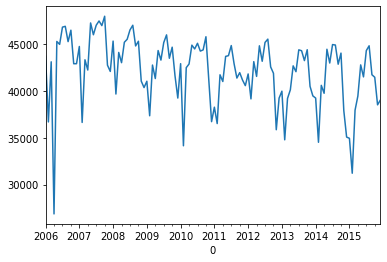

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4970      0.109      4.568      0.000       0.284       0.710
ma.L1         -0.9867      0.153     -6.443      0.000      -1.287      -0.687
ar.S.L12       0.0900      0.072      1.244      0.213      -0.052       0.232
ma.S.L12      -0.4419      0.101     -4.381      0.000      -0.640      -0.244
sigma2      3.459e+06   7.99e+05      4.331      0.000    1.89e+06    5.02e+06
0
2015-01    37065.896120
2015-02    32233.612737
2015-03    38213.165414
2015-04    38232.941286
2015-05    43307.549900
2015-06    41720.750471
2015-07    43676.987084
2015-08    43996.905072
2015-09    42437.043580
2015-10    42817.449353
2015-11    36738.060527
2015-12    36134.850686
Freq: M, Name: predicted_mean, dtype: float64


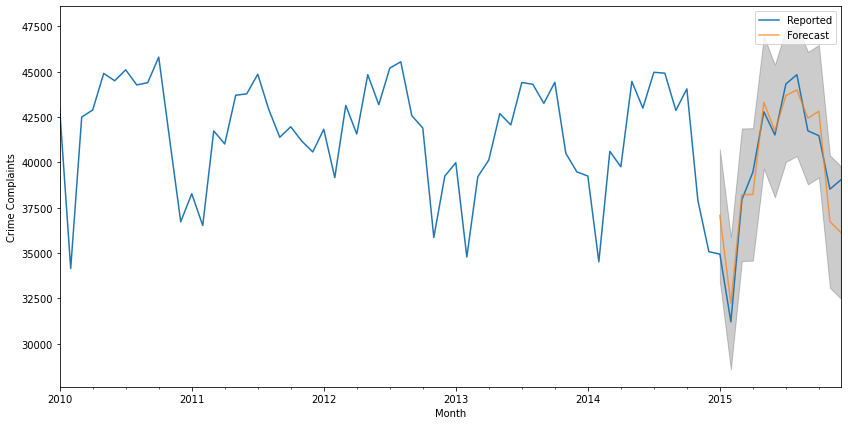

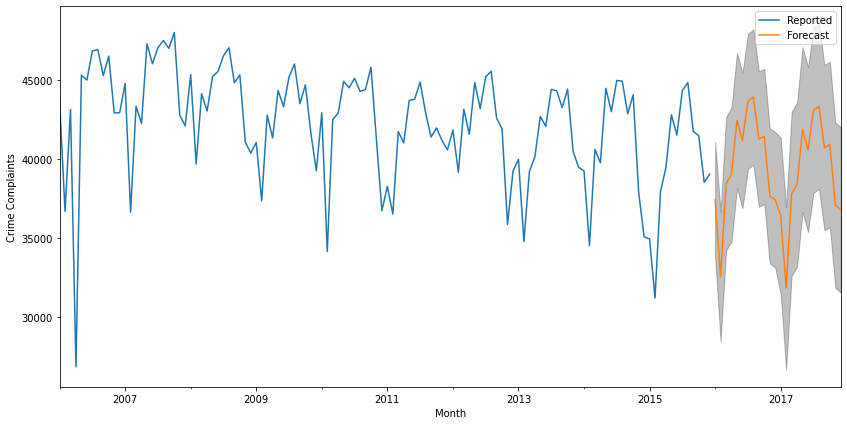

In [104]:
import datetime
import griddb_python as griddb
import sys
import pandas as pd
import traceback
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from dateutil.relativedelta import relativedelta

factory = griddb.StoreFactory.get_instance()
argv = sys.argv

gridstore = factory.get_store(
        host="239.0.0.1",
        port=31999,
        cluster_name="defaultCluster",
        username="admin",
        password="admin"
)


tqls=[]
dt =  datetime.datetime(2006, 1, 1, 0, 0, 0)
while dt < datetime.datetime(2016, 1, 1, 0, 0):
    start = int((dt + relativedelta(days=-1)).timestamp()*1000)
    end = int((dt + relativedelta(days=+1)).timestamp()*1000)
    query = "select sum(count) where timestamp > TO_TIMESTAMP_MS("+str(start)+")"
    query = query + " AND timestamp < TO_TIMESTAMP_MS("+str(end)+")"
    tqls.append([dt, query])
    dt = dt + relativedelta(months=+1);

data = []
col = gridstore.get_container("NYCC_AGGS")
for tql in tqls:
        q = col.query(tql[1])
        rs = q.fetch(False)
        if rs.has_next():
            row = rs.next()
            count = row.get(griddb.Type.LONG)
            data.append([tql[0], count])

df = pd.DataFrame.from_records(data)
df = df.set_index(0)
ts = df[1]
ts = ts.to_period('M')

ax = plt.gca()
ts.plot()
plt.show()


if False:
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    sel_param=None
    sel_param_seasonal=None
    lowest_aic=None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

                results = mod.fit()

                if lowest_aic == None or results.aic < lowest_aic:
                    sel_param = param
                    sel_param_seasonal = param_seasonal
                    lowest_aic = results.aic

            except:
                traceback.print_exc()
                continue
    print("Selected param=", sel_param, ", seasonal param=", sel_param_seasonal, " with AIC=",lowest_aic)
    
    
else:
    mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
    
    pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
    print(pred.predicted_mean)
    

    pred_ci = pred.conf_int()
    ax = ts['2010':].plot(label='Reported')
    pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Month')
    ax.set_ylabel('Crime Complaints')
    plt.legend()
    plt.show()

    
    pred_uc = results.get_forecast(steps=24)
    pred_ci = pred_uc.conf_int()
    
    ax = ts.plot(label='Reported', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Month')
    ax.set_ylabel('Crime Complaints')
    plt.legend()
    plt.show()